# Connecting to Google Drive.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir("/content/drive/MyDrive/DeepL/XYZ Project/Dataset")

In [8]:
!dir

level_1.csv  test_data.csv     x_train.csv		y_train.csv
level_2.csv  train_data.csv    x_train_scale.csv
level_3.csv  x_test.csv        XYZCorp_LendingData.txt
level_4.csv  x_test_scale.csv  y_test.csv


#Importing The Libraries

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


%matplotlib inline

In [2]:
#Suppress warnings

import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns',None)

In [3]:
#x_train.to_csv('x_train.csv')
#x_test.to_csv('x_test.csv')
#x_train_scale.to_csv('x_train_scale.csv')
#x_test_scale.to_csv('x_test_scale.csv')
#y_train.to_csv('y_train.csv')
#y_test.to_csv('y_test.csv')

# Model Building

**Custom function for Confusion matrix**

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import itertools


def plot_confusion_metrix(cm,classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    """this function prints and plot the confusion matirx
    Normalization can be applied by setting 'normalize=True'
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix, Without Normalisation")
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=35)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() /2.
    
    for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Logistic Regression

In [9]:
# lOADING TRAINING AND TESTING DATASET 

train_data = pd.read_csv('train_data.csv',header=0,low_memory=False)

test_data = pd.read_csv('test_data.csv',header=0,low_memory=False)

print(train_data.shape)
print(test_data.shape)

(598978, 37)
(256991, 37)


In [10]:
train_data.head()

,period,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
0,200706,7500.0,7500.0,800.0,1,13.75,255.43,5,0,3,22000.0,3,1,14.29,1.0,0.0,7.0,0.0,4175.0,51.5,8.0,1,0.0,0.0,9194.98,980.65,7500.0,1694.98,0.0,0.0,0.0,256.59,0.0,225.0,139766.0,32163.0,0
1,200707,5000.0,5000.0,4150.0,1,7.43,155.38,1,8,1,150000.0,3,3,0.00,0.0,0.0,2.0,0.0,6053.0,19.5,19.0,1,0.0,0.0,5174.17,4294.57,5000.0,174.17,0.0,0.0,0.0,4397.47,0.0,225.0,139766.0,32163.0,0
2,200707,5750.0,5750.0,3675.0,1,7.43,178.69,1,10,1,125000.0,3,1,0.27,0.0,0.0,10.0,0.0,2817.0,10.2,16.0,1,0.0,0.0,6421.50,4104.19,5750.0,671.50,0.0,0.0,0.0,4.74,0.0,225.0,139766.0,32163.0,0
3,200707,5000.0,5000.0,3975.0,1,7.43,155.38,1,6,2,40000.0,3,7,2.55,0.0,2.0,4.0,0.0,2562.0,14.0,7.0,1,0.0,0.0,5593.39,4446.74,5000.0,593.39,0.0,0.0,0.0,158.65,0.0,225.0,139766.0,32163.0,0
4,200707,1200.0,1200.0,0.0,1,11.54,39.60,3,0,2,20000.0,3,2,2.04,0.0,2.0,3.0,0.0,1153.0,75.8,4.0,1,0.0,0.0,1425.37,0.00,1200.0,225.37,0.0,0.0,0.0,39.45,0.0,225.0,139766.0,32163.0,0


In [11]:
new_df = pd.concat([train_data,test_data])
new_df.shape

(855969, 37)

In [12]:
X = new_df.values[:,1:-1]
Y = new_df.values[:,-1]

In [13]:
# scalling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [14]:
# use manual method for data partition 

X_train = X[:598978]
X_test = X[598978:]
Y_train = Y[:598978]
Y_test = Y[598978:]

In [15]:
Y_train=Y_train.astype(int)

In [16]:
Y_test=Y_test.astype(int)

In [17]:
Y_train

array([0, 0, 0, ..., 0, 0, 0])

In [18]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# fitting training data to the model
classifier.fit(X_train, Y_train)

LogisticRegression()

In [19]:
Y_pred = classifier.predict(X_test)

Confusion Matrix, Without Normalisation
[[256628     52]
 [    63    248]]


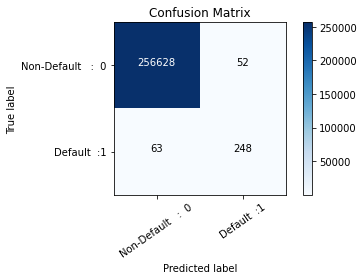

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995525135121464


In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

## tunnig the model

In [21]:
# store the predicted probabilities
# aadusting the threshold levle for probablites 

y_pred_prob = classifier.predict_proba(X_test)
print("   class : 0  class: 1  ")
print(y_pred_prob)

   class : 0  class: 1  
[[0.9989651  0.0010349 ]
 [0.99695151 0.00304849]
 [0.99310587 0.00689413]
 ...
 [0.99080777 0.00919223]
 [0.99627204 0.00372796]
 [0.99733035 0.00266965]]


In [22]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

Confusion Matrix, Without Normalisation
[[256635     45]
 [    63    248]]


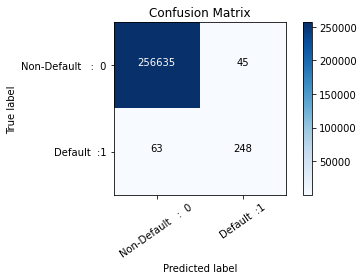

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.80      0.82       311

    accuracy                           1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995797518201026


In [23]:
#Confusion Matrix

conf_matrix = confusion_matrix(Y_test,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:", acc)

In [24]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] 
    print("Errors at threshold ", a, ":",total_err, " , type 2 => ", 
        cfm[1,0]," , type 1 => ", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 =>  0  , type 1 =>  256680
Errors at threshold  0.01 : 46159  , type 2 =>  36  , type 1 =>  46123
Errors at threshold  0.02 : 10253  , type 2 =>  54  , type 1 =>  10199
Errors at threshold  0.03 : 4275  , type 2 =>  59  , type 1 =>  4216
Errors at threshold  0.04 : 2535  , type 2 =>  61  , type 1 =>  2474
Errors at threshold  0.05 : 1649  , type 2 =>  62  , type 1 =>  1587
Errors at threshold  0.06 : 1156  , type 2 =>  62  , type 1 =>  1094
Errors at threshold  0.07 : 865  , type 2 =>  62  , type 1 =>  803
Errors at threshold  0.08 : 687  , type 2 =>  62  , type 1 =>  625
Errors at threshold  0.09 : 557  , type 2 =>  62  , type 1 =>  495
Errors at threshold  0.1 : 478  , type 2 =>  63  , type 1 =>  415
Errors at threshold  0.11 : 428  , type 2 =>  63  , type 1 =>  365
Errors at threshold  0.12 : 384  , type 2 =>  63  , type 1 =>  321
Errors at threshold  0.13 : 351  , type 2 =>  63  , type 1 =>  288
Errors at threshold  0.14 : 324  , type 2 =

## Using cross validation

In [25]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.98599285 0.99403987 0.99737888 0.9979632  0.99666099 0.99657752
 0.99722862 0.99701159 0.99737883 0.99789639]
0.9958128740111899


Confusion Matrix, Without Normalisation
[[256628     52]
 [    63    248]]


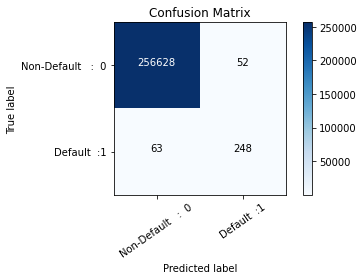

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9995525135121464


In [26]:
#Confusion Matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Decision Tree

In [27]:
# import the scale data set

x_train = pd.read_csv('x_train.csv',index_col=0)
x_test = pd.read_csv('x_test.csv',index_col=0)
y_train = pd.read_csv('y_train.csv',index_col=0)
y_test = pd.read_csv('y_test.csv',index_col=0)


# import the scale data set

x_train_scale = pd.read_csv('x_train_scale.csv',index_col=0)
x_test_scale = pd.read_csv('x_test_scale.csv',index_col=0)

In [28]:
#Running Decision Tree Model
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree = DecisionTreeClassifier(criterion = 'entropy',max_features=8,random_state=0,)
model_DecisionTree.fit(x_train_scale,y_train)

#fit the model on the data and predict the values 

y_pred = model_DecisionTree.predict(x_test_scale)

In [29]:
y_pred

array([0., 1., 1., ..., 1., 1., 1.])

Confusion Matrix, Without Normalisation
[[ 72972 183708]
 [     1    310]]


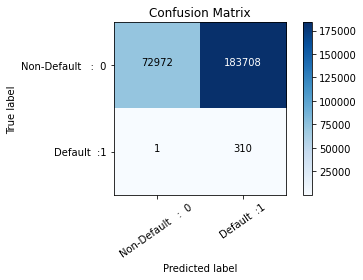

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.28      0.44    256680
         1.0       0.00      1.00      0.00       311

    accuracy                           0.29    256991
   macro avg       0.50      0.64      0.22    256991
weighted avg       1.00      0.29      0.44    256991

Accuracy of the model: 0.2851539548077559


In [30]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

## **ANN**

Text(0.5, 1.0, 'Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

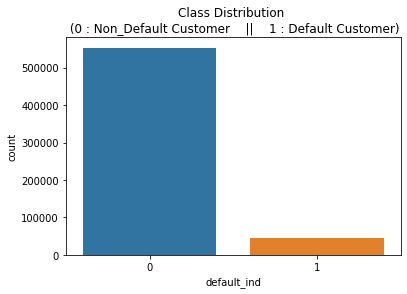

In [31]:
sns.countplot('default_ind', data=train_data)

plt.title('Class Distribution \n (0 : Non_Default Customer    ||    1 : Default Customer)')

**We can clearly see that the data is imblanced that's why it was giving this type of prediciting bias towards Non_Default_Customer so what we will that we first check your predicition using ANN model Late will use SMOTE Techniques to equalized the data**

In [32]:
nd = round(train_data['default_ind'].value_counts()[0]/len(train_data) * 100, 2)

d = round(train_data['default_ind'].value_counts()[1]/len(train_data) * 100, 2)

print('Non_Default Customer : {} % of the dataset'.format(nd))
print('Default Customer : {} % of the dataset'.format(d))

Non_Default Customer : 92.29 % of the dataset
Default Customer : 7.71 % of the dataset


In [33]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Deep Learning Model on

**Un-Balanced Data set**

In [34]:
# Importing the keras libraries and package

import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [35]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 35))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [36]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [37]:
# Fitting the ANN to the Training set

classifier.fit(x_train, y_train, batch_size = 100, epochs = 10)

Epoch 1/10
5990/5990 [==============================] - 28s 4ms/step - loss: 0.0401 - accuracy: 0.9927
Epoch 2/10
5990/5990 [==============================] - 25s 4ms/step - loss: 0.0271 - accuracy: 0.9956
Epoch 3/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0224 - accuracy: 0.9963
Epoch 4/10
5990/5990 [==============================] - 25s 4ms/step - loss: 0.0205 - accuracy: 0.9964
Epoch 5/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0201 - accuracy: 0.9966
Epoch 6/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0203 - accuracy: 0.9966
Epoch 7/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0220 - accuracy: 0.9963
Epoch 8/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0217 - accuracy: 0.9962
Epoch 9/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0185 - accuracy: 0.9972
Epoch 10/10
5990/5990 [==============================] - 23s 4ms/step - l

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [39]:
y_pred

array([[0.00243275],
       [0.00243275],
       [0.00243275],
       ...,
       [0.00243275],
       [0.00243275],
       [0.00243275]], dtype=float32)

In [40]:
y_pred = (y_pred > 0.5)

In [41]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Confusion Matrix, Without Normalisation
[[256680      0]
 [    63    248]]


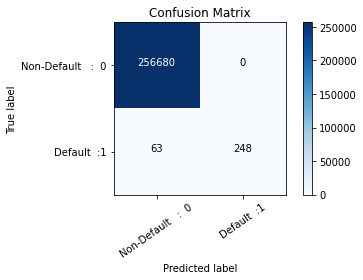

Classification report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    256680
         1.0       1.00      0.80      0.89       311

    accuracy                           1.00    256991
   macro avg       1.00      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997548552283932


In [42]:
conf_matrix = confusion_matrix(y_test, y_pred.round())
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

**Balanced Data set**


*Using Smote Technique*

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
x_new, y_new = SMOTE().fit_resample(x_train_scale,y_train)

In [63]:
x_new

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.844559,-0.843203,-1.640620,-0.634014,0.052412,-0.737495,1.682281,-1.698028,2.149639,-0.915633,1.286434,-0.521055,-0.414882,0.848153,-0.730864,-0.847976,-0.32479,-0.589107,-0.183001,-1.470150,-0.809528,-0.811282,-0.811236,-0.108522,-1.121129,-0.033334,-0.255238,-0.103534,-0.136873,-0.094862,-0.474069,-0.09384,0.001194,0.004790,0.027250
1,-1.144446,-1.143412,-1.238829,-0.634014,-1.393496,-1.149406,-1.365338,0.492187,-0.900245,1.339413,1.286434,0.567029,-2.185476,-0.358617,-0.730864,-1.821052,-0.32479,-0.499397,-1.532957,-0.531397,-0.809528,-0.811282,-0.811236,-0.605437,-0.710525,-0.394434,-0.924911,-0.103534,-0.136873,-0.094862,0.292991,-0.09384,0.001194,0.004790,0.027250
2,-1.054480,-1.053349,-1.295800,-0.634014,-1.393496,-1.053437,-1.365338,1.039741,-0.900245,0.898974,1.286434,-0.521055,-2.152022,-0.358617,-0.730864,-0.264131,-0.32479,-0.653977,-1.925287,-0.787420,-0.809528,-0.811282,-0.811236,-0.451285,-0.734114,-0.286104,-0.705917,-0.103534,-0.136873,-0.094862,-0.520722,-0.09384,0.001194,0.004790,0.027250
3,-1.144446,-1.143412,-1.259819,-0.634014,-1.393496,-1.149406,-1.365338,-0.055367,0.624697,-0.598518,1.286434,2.743197,-1.869520,-0.358617,1.268148,-1.431822,-0.32479,-0.666158,-1.764980,-1.555491,-0.809528,-0.811282,-0.811236,-0.553627,-0.691671,-0.394434,-0.740312,-0.103534,-0.136873,-0.094862,-0.492212,-0.09384,0.001194,0.004790,0.027250
4,-1.600275,-1.599730,-1.736569,-0.634014,-0.453198,-1.626078,0.158472,-1.698028,0.624697,-0.950869,1.286434,0.022987,-1.932711,-0.358617,1.268148,-1.626437,-0.32479,-0.733464,0.842122,-1.811515,-0.809528,-0.811282,-0.811236,-1.068736,-1.242635,-0.943307,-0.902366,-0.103534,-0.136873,-0.094862,-0.514292,-0.09384,0.001194,0.004790,0.027250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105639,0.571178,0.574056,0.578491,1.577252,1.958194,0.406955,1.948090,0.848714,0.624697,0.147848,-0.376915,1.870278,0.060713,-0.358617,1.268148,0.659195,-0.32479,-0.166012,-0.395904,1.705311,-0.809528,-0.811282,-0.811236,-0.434211,-0.429875,-0.753301,0.779210,-0.103534,-0.136873,-0.094862,-0.422791,-0.09384,-0.017634,-0.682621,-0.078575
1105640,1.694977,1.699063,1.702126,1.577252,1.944235,1.471951,1.682281,0.946235,-0.900245,0.028125,-1.039456,-0.521055,0.595830,-0.358617,0.154851,0.125099,-0.32479,-0.060895,0.128489,0.395539,-0.809528,-0.811282,-0.811236,0.098968,0.104673,-0.896140,0.232855,-0.103534,13.181988,15.697317,-0.374873,-0.09384,-0.017634,0.341165,-0.154439
1105641,-1.014976,-1.013802,-1.007431,-0.634014,-0.236762,-0.951960,-0.573212,-1.698028,0.624697,-0.504122,1.286434,-0.521055,0.170103,-0.358617,0.228997,1.323667,-0.32479,-0.597651,-0.790401,-0.507702,-0.809528,-0.811282,-0.811236,-0.975068,-0.972119,-0.887960,-0.737356,-0.103534,-0.136873,-0.094862,-0.483934,-0.09384,-0.017634,-0.271980,-0.591948
1105642,-1.146649,-1.145617,-1.139085,-0.634014,-0.232739,-1.102991,0.228429,-1.150474,0.624697,-0.461901,-1.179845,0.122893,-0.127799,-0.358617,-0.730864,-0.581884,-0.32479,0.301327,1.420114,-1.019936,-0.809528,-0.811282,-0.811236,-1.049368,-1.046610,-0.948504,-0.820501,-0.103534,-0.123068,-0.094245,-0.490729,-0.09384,0.001194,0.004790,0.027250


In [64]:
x_cols=[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim']]

y_cols = [['default_ind']]

In [65]:
x = pd.DataFrame(x_new, columns=x_cols)
y = pd.DataFrame(y_new, columns=y_cols)

In [66]:
data = pd.concat([x, y], axis = 1)

In [ ]:
data.head()

In [68]:
data.shape

(1105644, 36)

In [69]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 35))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [70]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [71]:
# Fitting the ANN to the Training set

classifier.fit(x_new, y_new, batch_size = 100, epochs = 10)

Epoch 1/10
11057/11057 [==============================] - 47s 4ms/step - loss: 0.0458 - accuracy: 0.9870
Epoch 2/10
11057/11057 [==============================] - 43s 4ms/step - loss: 0.0332 - accuracy: 0.9915
Epoch 3/10
11057/11057 [==============================] - 44s 4ms/step - loss: 0.0312 - accuracy: 0.9920
Epoch 4/10
11057/11057 [==============================] - 58s 5ms/step - loss: 0.0299 - accuracy: 0.9922
Epoch 5/10
11057/11057 [==============================] - 43s 4ms/step - loss: 0.0288 - accuracy: 0.9924
Epoch 6/10
11057/11057 [==============================] - 43s 4ms/step - loss: 0.0279 - accuracy: 0.9926
Epoch 7/10
11057/11057 [==============================] - 43s 4ms/step - loss: 0.0272 - accuracy: 0.9927
Epoch 8/10
11057/11057 [==============================] - 48s 4ms/step - loss: 0.0266 - accuracy: 0.9929
Epoch 9/10
11057/11057 [==============================] - 43s 4ms/step - loss: 0.0261 - accuracy: 0.9930
Epoch 10/10
11057/11057 [==============================

In [72]:
# Predicting the Test set results
y_pred = classifier.predict(x_test_scale)

In [73]:
y_pred

array([[0.00960174],
       [0.17539978],
       [0.05570943],
       ...,
       [0.9967956 ],
       [1.        ],
       [0.99999976]], dtype=float32)

In [74]:
y_pred = (y_pred > 0.5)

In [75]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

Confusion Matrix, Without Normalisation
[[115536 141144]
 [    10    301]]


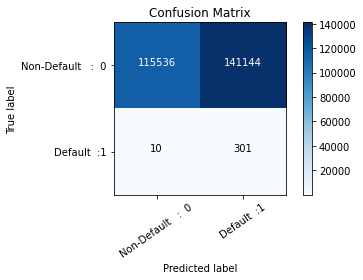

Classification report
              precision    recall  f1-score   support

         0.0       1.00      0.45      0.62    256680
         1.0       0.00      0.97      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.71      0.31    256991
weighted avg       1.00      0.45      0.62    256991

Accuracy of the model: 0.4507434112478647


In [76]:
conf_matrix = confusion_matrix(y_test, y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(y_test,y_pred))

acc= accuracy_score(y_test,y_pred)
print("Accuracy of the model:", acc)

## Creating another dataframe with new variables

In [77]:
data=pd.read_csv('XYZCorp_LendingData.txt',header=0 ,
                      delimiter="\t", low_memory=False)

data.shape

(855969, 73)

In [78]:
data.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [79]:
#Feature Selection
# Out of 73 , few variables are not helpful or impactful in order to build a predictive model, hence dropping.

data.drop(['id','member_id','funded_amnt_inv','grade','emp_title','pymnt_plan','desc','title','addr_state',
            'inq_last_6mths','mths_since_last_record','initial_list_status','mths_since_last_major_derog','policy_code',
            'dti_joint','verification_status_joint','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m'
            ,'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m',
            'max_bal_bc','all_util','inq_fi','total_cu_tl','inq_last_12m'],axis=1,inplace=True)

data.shape

(855969, 41)

In [80]:
# Checking if missing values are present and datatype of each variable.
data.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
sub_grade                          0
emp_length                     43061
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
t

In [81]:
# Imputing missing data for categorical variable with mode value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'issue_d','purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d']
for x in colname1[:]:
     data[x].fillna(data[x].mode()[0],inplace=True)
    
data.isnull().sum()

loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
sub_grade                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
purpose                            0
zip_code                           0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
mths_since_last_delinq        439812
open_acc                           0
pub_rec                            0
revol_bal                          0
revol_util                       446
total_acc                          0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
t

In [82]:
# Imputing missing data for Numerical with mean value / Zeros 
data['annual_inc_joint'].fillna(0,inplace=True)

colname2=['mths_since_last_delinq','revol_util','collections_12_mths_ex_med',
          'total_rev_hi_lim']
for x in colname2[:]:
    data[x].fillna(data[x].mean(),inplace=True)
    
data.isnull().sum()
data.shape   

(855969, 41)

In [83]:
# Label Encoding - to label all categorical variable value with numeric value
#Label will get assigned in Ascending alphabetical of variable value

colname1=['term','sub_grade','emp_length','home_ownership','verification_status',
          'purpose','zip_code','earliest_cr_line','last_pymnt_d',
          'next_pymnt_d','last_credit_pull_d','application_type']

data.head()
from sklearn import preprocessing

le={}

for x in colname1:
     le[x]=preprocessing.LabelEncoder()

for x in colname1:
     data[x]=le[x].fit_transform(data[x])
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,Dec-2011,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,Dec-2011,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,Dec-2011,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,Dec-2011,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,Dec-2011,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [84]:
#Train and Test split

# issue_d is object datatype to make use for split converting issue_d in Date

data.issue_d = pd.to_datetime(data.issue_d)   #%y-%m-%d
col_name = 'issue_d'
print (data[col_name].dtype)

#split data in train and test

split_date = "2015-05-01"

train = data.loc[data['issue_d'] <= split_date]
train=train.drop(['issue_d'],axis=1)
#train.head()
train.shape    #(598978, 40)

test = data.loc[data['issue_d'] > split_date]
test=test.drop(['issue_d'],axis=1)
#test.head()
test.shape  #(256991, 40)

datetime64[ns]


(256991, 40)

In [85]:
train.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [86]:
test.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
452272,25000.0,25000.0,0,5.32,752.87,0,0,1,150000.0,0,1,46,9.54,0.0,208,34.149943,7.0,0.0,19339.0,42.5,18.0,24357.97,24357.97,682.67,682.67,642.03,40.64,0.0,0.0,0.0,40,701.14,0,41,0.0,0,0.0,0.0,45500.0,0
452273,18000.0,18000.0,1,19.48,471.70,21,7,5,150000.0,0,2,850,9.39,0.0,398,34.149943,18.0,1.0,14052.0,40.7,27.0,17820.50,17820.50,286.64,286.64,179.50,107.14,0.0,0.0,0.0,40,335.34,0,41,0.0,0,0.0,0.0,34500.0,0
452274,7000.0,7000.0,0,7.49,217.72,3,1,1,59000.0,0,1,201,13.06,1.0,623,23.000000,10.0,0.0,10467.0,24.2,34.0,7000.00,7000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,0.0,43200.0,0
452275,20000.0,20000.0,0,17.97,722.75,18,7,1,180000.0,0,2,728,25.10,0.0,31,34.149943,13.0,0.0,59126.0,92.1,30.0,20000.00,20000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,0.0,64200.0,0
452276,15000.0,15000.0,0,6.99,463.09,2,2,1,93000.0,0,1,12,14.86,0.0,620,34.149943,8.0,0.0,14914.0,43.2,17.0,15000.00,15000.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,40,0.00,0,41,0.0,0,0.0,0.0,34500.0,0


In [87]:
#selecting X and Y

X_train=train.values[:,:-1]
Y_train=train.values[:,-1]
Y_train=Y_train.astype(int)
print(Y_train)

X_test=test.values[:,:-1]
Y_test=test.values[:,-1]
Y_test=Y_test.astype(int)
print(Y_test)


[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]


# Once Again LOGISTIC REGRESSION

In [88]:
#all reg module includes in sklearn.linear_model
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#colname=XYZ_DF_rev.columns[:]
#fitting training data to the model
classifier.fit(X_train,Y_train)
#predicting on Test data
Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

Confusion Matrix, Without Normalisation
[[256649     31]
 [    63    248]]


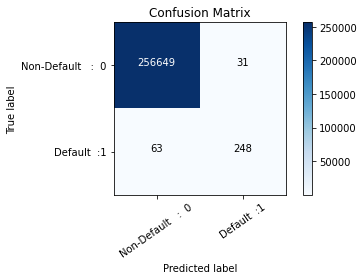

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.89      0.80      0.84       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9996342284360152


In [89]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

## tunnig the model

In [90]:
# store the predicted probabilities
# aadusting the threshold level for probablites 

y_pred_prob = classifier.predict_proba(X_test)
print("   class : 0  class: 1  ")
print(y_pred_prob)

   class : 0  class: 1  
[[9.99881333e-01 1.18666675e-04]
 [9.99873367e-01 1.26632637e-04]
 [9.85949815e-01 1.40501847e-02]
 ...
 [9.99935331e-01 6.46689091e-05]
 [9.99910184e-01 8.98156851e-05]
 [9.99985428e-01 1.45723578e-05]]


In [91]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.60:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

Confusion Matrix, Without Normalisation
[[256652     28]
 [    63    248]]


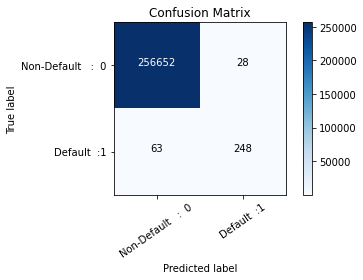

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.90      0.80      0.84       311

    accuracy                           1.00    256991
   macro avg       0.95      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.999645901996568


In [92]:
#Confusion matrix
conf_matrix = confusion_matrix(Y_test,y_pred_class)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test,y_pred_class)
print("Accuracy of the model:", acc)

In [93]:
for a in np.arange(0,1,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0] 
    print("Errors at threshold ", a, ":",total_err, " , type 2 => ", 
        cfm[1,0]," , type 1 => ", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 =>  0  , type 1 =>  256680
Errors at threshold  0.01 : 54684  , type 2 =>  45  , type 1 =>  54639
Errors at threshold  0.02 : 27361  , type 2 =>  55  , type 1 =>  27306
Errors at threshold  0.03 : 15712  , type 2 =>  59  , type 1 =>  15653
Errors at threshold  0.04 : 9773  , type 2 =>  60  , type 1 =>  9713
Errors at threshold  0.05 : 6381  , type 2 =>  61  , type 1 =>  6320
Errors at threshold  0.06 : 4334  , type 2 =>  61  , type 1 =>  4273
Errors at threshold  0.07 : 3058  , type 2 =>  62  , type 1 =>  2996
Errors at threshold  0.08 : 2160  , type 2 =>  62  , type 1 =>  2098
Errors at threshold  0.09 : 1573  , type 2 =>  62  , type 1 =>  1511
Errors at threshold  0.1 : 1154  , type 2 =>  62  , type 1 =>  1092
Errors at threshold  0.11 : 857  , type 2 =>  62  , type 1 =>  795
Errors at threshold  0.12 : 665  , type 2 =>  63  , type 1 =>  602
Errors at threshold  0.13 : 511  , type 2 =>  63  , type 1 =>  448
Errors at threshold  0.14 : 421  

# Decision_Tree_Classifier

In [94]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier()
model_DecisionTree.fit(X_train,Y_train)

#fit the model on the data and predict the values
Y_pred=model_DecisionTree.predict(X_test)

Confusion Matrix, Without Normalisation
[[250597   6083]
 [     9    302]]


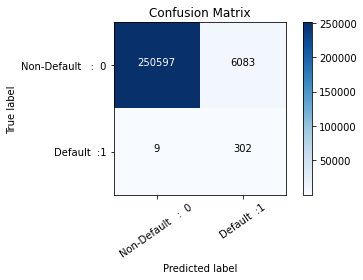

Classification report
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    256680
           1       0.05      0.97      0.09       311

    accuracy                           0.98    256991
   macro avg       0.52      0.97      0.54    256991
weighted avg       1.00      0.98      0.99    256991

Accuracy of the model: 0.9762948897043087


In [95]:
#Confusion matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

## Gradient_Boosting_Classifier

In [96]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=100,)


#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

Confusion Matrix, Without Normalisation
[[256625     55]
 [    10    301]]


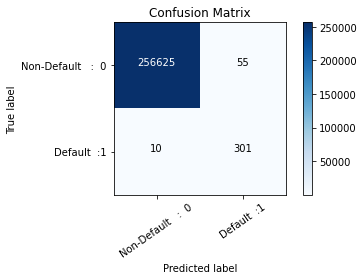

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.97      0.90       311

    accuracy                           1.00    256991
   macro avg       0.92      0.98      0.95    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997470728546914


In [97]:
#Confusion matrix
conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# Again ANN

In [98]:
# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 19, kernel_initializer = 'uniform',
                     activation = 'relu', input_dim = 39))


# Adding the second hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# dropout for second layer 
# classifier.add(Dropout(p = 0.1))

# Adding the third hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))

# Adding the fourth hidden layer 
classifier.add(Dense(units=19, kernel_initializer='uniform',
                     activation='relu'))


# Adding the output layer 
classifier.add(Dense(units=1, kernel_initializer='uniform',
                     activation='sigmoid'))

In [99]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [100]:
# Fitting the ANN to the Training set

classifier.fit(X_train,Y_train, batch_size = 100, epochs = 10)

Epoch 1/10
5990/5990 [==============================] - 38s 6ms/step - loss: 0.0333 - accuracy: 0.9935
Epoch 2/10
5990/5990 [==============================] - 37s 6ms/step - loss: 0.0209 - accuracy: 0.9967
Epoch 3/10
5990/5990 [==============================] - 24s 4ms/step - loss: 0.0195 - accuracy: 0.9968
Epoch 4/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0175 - accuracy: 0.9971
Epoch 5/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0178 - accuracy: 0.9969
Epoch 6/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0177 - accuracy: 0.9971
Epoch 7/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0192 - accuracy: 0.9970
Epoch 8/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0181 - accuracy: 0.9970
Epoch 9/10
5990/5990 [==============================] - 23s 4ms/step - loss: 0.0173 - accuracy: 0.9972
Epoch 10/10
5990/5990 [==============================] - 23s 4ms/step - l

In [101]:
# Predicting the Test set results
Y_pred = classifier.predict(X_test)

In [102]:
Y_pred

array([[0.00304112],
       [0.00304112],
       [0.00304112],
       ...,
       [0.00304112],
       [0.00304112],
       [0.00304112]], dtype=float32)

In [103]:
Y_pred = (Y_pred > 0.5)

In [104]:
Y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

Confusion Matrix, Without Normalisation
[[256677      3]
 [    63    248]]


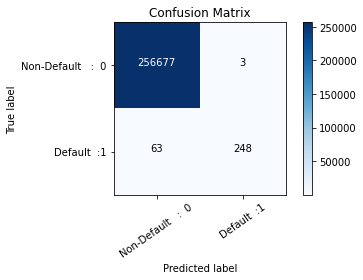

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.99      0.80      0.88       311

    accuracy                           1.00    256991
   macro avg       0.99      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model: 0.9997431816678405


In [105]:
conf_matrix = confusion_matrix(Y_test,Y_pred)
plot_confusion_metrix(conf_matrix,classes=['Non-Default   :  0','Default  :1'])
plt.show()

print('Classification report')

print(classification_report(Y_test,Y_pred))

acc= accuracy_score(Y_test,Y_pred)
print("Accuracy of the model:", acc)

# FINAL MODEL

**Gradient Boosting Classifier**

In [106]:
data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,2011-12-01,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,2011-12-01,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,2011-12-01,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,2011-12-01,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,2011-12-01,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [107]:
data = data.drop('issue_d', axis=1)

In [108]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [109]:
x.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526


In [110]:
y.head(3)

0    0
1    1
2    0
Name: default_ind, dtype: int64

In [111]:
#predicting using the 
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=130,)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

GradientBoostingClassifier(n_estimators=130)

**Prediction on Full data set**

In [112]:
Y_full_pred=model_GradientBoosting.predict(x)

In [113]:
Y_full_pred

array([0, 1, 0, ..., 0, 0, 0])

In [114]:
x.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526


In [115]:
final_df = pd.DataFrame()

In [116]:
final_df = pd.concat([x,y],axis=1)

In [117]:
final_df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0


In [118]:
final_df['Predicted_class']=Y_full_pred

In [119]:
final_df.shape

(855969, 41)

In [120]:
final_df.head(10)

,loan_amnt,funded_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,zip_code,dti,delinq_2yrs,earliest_cr_line,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,application_type,annual_inc_joint,acc_now_delinq,total_rev_hi_lim,default_ind,Predicted_class
0,5000.0,5000.0,0,10.65,162.87,6,1,5,24000.0,2,1,805,27.65,0.0,263,34.149943,3.0,0.0,13648.0,83.7,9.0,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,0,41,0.0,0,0.0,0.0,32163.574526,0,0
1,2500.0,2500.0,1,15.27,59.83,13,10,5,30000.0,1,0,295,1.00,0.0,41,34.149943,3.0,0.0,1687.0,9.4,4.0,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,0,99,0.0,0,0.0,0.0,32163.574526,1,1
2,2400.0,2400.0,0,15.96,84.33,14,1,5,12252.0,0,11,568,8.72,0.0,570,34.149943,2.0,0.0,2956.0,98.5,10.0,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,0,41,0.0,0,0.0,0.0,32163.574526,0,0
3,10000.0,10000.0,0,13.49,339.31,10,1,5,49200.0,1,9,851,20.00,0.0,208,35.000000,10.0,0.0,5598.0,21.0,37.0,0.00,0.00,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,0,40,0.0,0,0.0,0.0,32163.574526,0,0
4,3000.0,3000.0,1,12.69,67.79,9,0,5,80000.0,1,9,904,17.94,0.0,274,38.000000,15.0,0.0,27783.0,53.9,38.0,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,0,41,0.0,0,0.0,0.0,32163.574526,0,0
5,5000.0,5000.0,0,7.90,156.46,3,3,5,36000.0,1,13,798,11.20,0.0,573,34.149943,9.0,0.0,7963.0,28.3,12.0,0.00,0.00,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,39,161.03,0,101,0.0,0,0.0,0.0,32163.574526,0,0
6,7000.0,7000.0,1,15.96,170.08,14,8,5,47004.0,0,2,266,23.51,0.0,340,34.149943,7.0,0.0,17726.0,85.6,11.0,1889.15,1889.15,8136.840000,8136.84,5110.85,3025.99,0.00,0.00,0.00,40,170.08,0,41,0.0,0,0.0,0.0,32163.574526,0,0
7,3000.0,3000.0,0,18.64,109.43,20,9,5,48000.0,1,0,834,5.35,0.0,285,34.149943,4.0,0.0,8221.0,87.5,4.0,0.00,0.00,3938.144334,3938.14,3000.00,938.14,0.00,0.00,0.00,39,111.34,0,23,0.0,0,0.0,0.0,32163.574526,0,0
8,5600.0,5600.0,1,21.28,152.39,26,4,4,40000.0,1,11,892,5.55,0.0,46,34.149943,11.0,0.0,5210.0,32.6,13.0,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,4,152.39,0,12,0.0,0,0.0,0.0,32163.574526,1,1
9,5375.0,5375.0,1,12.69,121.45,9,10,5,15000.0,2,9,724,18.08,0.0,688,34.149943,2.0,0.0,9279.0,36.5,3.0,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,77,121.45,0,65,0.0,0,0.0,0.0,32163.574526,1,1


**Export the final data-frame to Root Directory**

In [121]:
final_df.to_csv('final_data_with_prediction.csv')

**THE END**